# Data Understanding: Exploratory Data Anaylsis

### Import Relevant Libraries and Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Terry_Cleaned.csv')
df.head()

,Unnamed: 0,Subject Age Group,Stop Resolution,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Officer Squad,Weapon,Call Made,Arrest Made,Frisk,Year Reported
0,0,26 - 35,Arrest,1984,M,Black or African American,Asian,Male,SOUTH PCT 1ST W - ROBERT,0,0,0,0,2015
1,1,26 - 35,Field Contact,1965,M,White,Other,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
2,2,26 - 35,Field Contact,1961,M,White,White,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
3,3,26 - 35,Field Contact,1963,M,White,Other,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
4,4,26 - 35,Field Contact,1977,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Subject Age Group,Stop Resolution,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Officer Squad,Weapon,Call Made,Arrest Made,Frisk,Year Reported
0,26 - 35,Arrest,1984,M,Black or African American,Asian,Male,SOUTH PCT 1ST W - ROBERT,0,0,0,0,2015
1,26 - 35,Field Contact,1965,M,White,Other,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
2,26 - 35,Field Contact,1961,M,White,White,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
3,26 - 35,Field Contact,1963,M,White,Other,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
4,26 - 35,Field Contact,1977,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015


### EDA

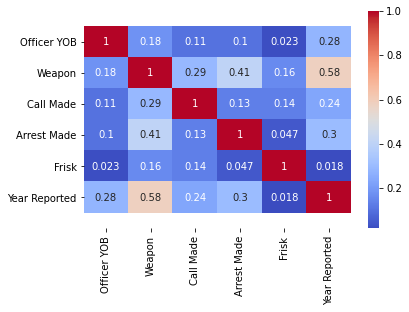

In [4]:
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')  #Heatmap with Correlations overlaid on features.

# Scale the Heat Map, so the correlation values are centered and ledgeable
b, t = plt.ylim() # Discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

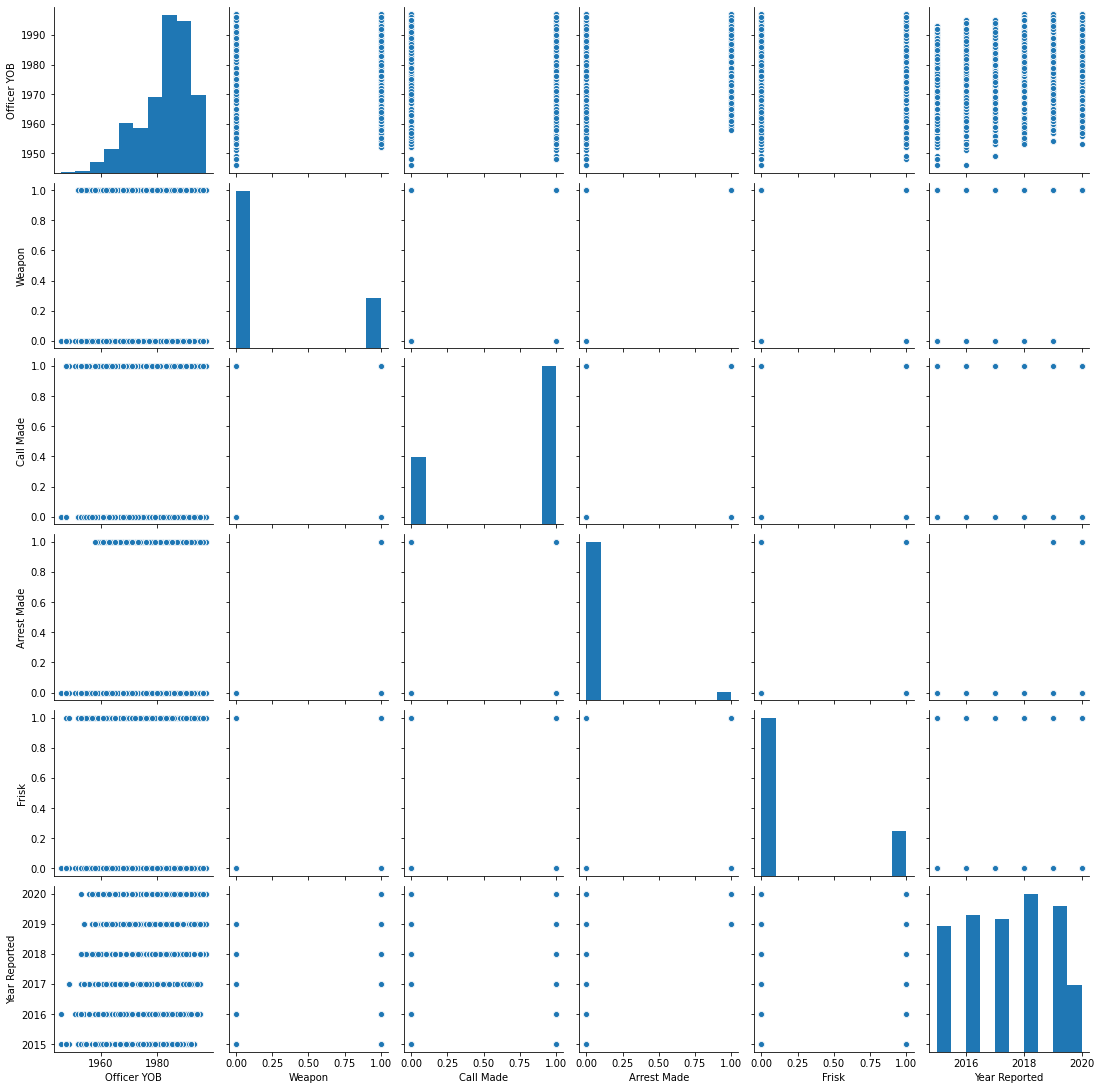

In [5]:
sns.pairplot(df)

In [6]:
# On average how many white cops stop black people when 
# no calls are made. Is it race or age?
df.loc[(df['Officer Race'] == 'White') & (df['Subject Perceived Race'] == 'Black or African American')]

,Subject Age Group,Stop Resolution,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Officer Squad,Weapon,Call Made,Arrest Made,Frisk,Year Reported
4,26 - 35,Field Contact,1977,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
5,26 - 35,Field Contact,1973,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
16,26 - 35,Field Contact,1959,M,White,Black or African American,Male,WEST PCT 2ND W - MARY BEATS,0,0,0,1,2015
42,26 - 35,Field Contact,1986,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
45,26 - 35,Field Contact,1986,M,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,0,0,0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43045,56 and Above,Field Contact,1996,M,White,Black or African American,Male,NORTH PCT 3RD W - B/N RELIEF,1,1,0,0,2020
43055,56 and Above,Field Contact,1976,F,White,Black or African American,Male,TRAINING - FIELD TRAINING SQUAD,1,1,0,1,2020
43056,56 and Above,Field Contact,1968,M,White,Black or African American,Male,NORTH PCT 2ND W - NORA,1,1,0,0,2020
43058,56 and Above,Offense Report,1992,M,White,Black or African American,Male,WEST PCT 3RD W - KING,1,1,0,0,2020


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

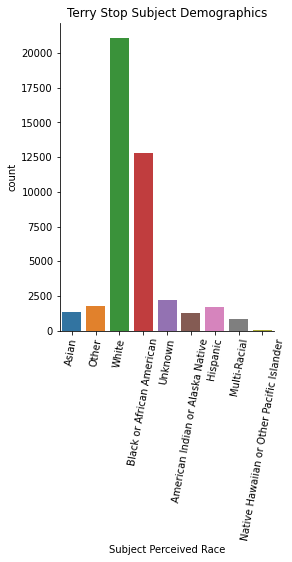

In [7]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Subject Perceived Race', kind='count', data=df)
plt.title("Terry Stop Subject Demographics")
plt.xticks(rotation=80)


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

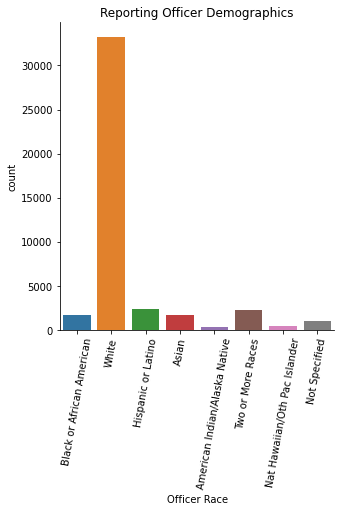

In [8]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Officer Race', kind='count', data=df)
plt.title("Reporting Officer Demographics")
plt.xticks(rotation=80)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

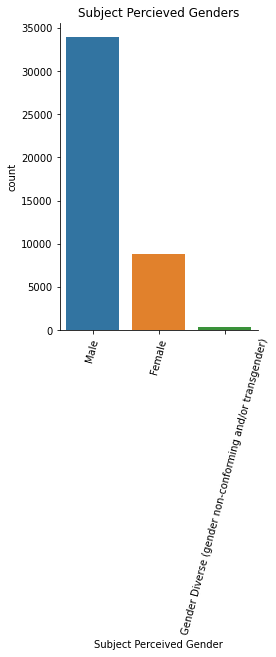

In [9]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Subject Perceived Gender', kind='count', data=df)
plt.title("Subject Percieved Genders")
plt.xticks(rotation=75)


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

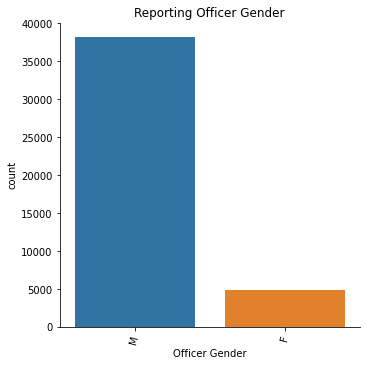

In [10]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(x= 'Officer Gender', kind='count', data=df)
plt.title("Reporting Officer Gender")
plt.xticks(rotation=75)

In [11]:
# Does age play a part in racism or bias? 
# Is it race or age?

df.groupby(['Officer YOB', 'Officer Race', 'Subject Perceived Race']).median().head()

Weapon  Call Made  \
Officer YOB Officer Race Subject Perceived Race                         
1946        Asian        Black or African American     0.0        0.0   
                         White                         0.0        0.0   
1948        White        Asian                         0.0        1.0   
                         Black or African American     0.0        0.0   
                         Hispanic                      0.0        1.0   

                                                    Arrest Made  Frisk  \
Officer YOB Officer Race Subject Perceived Race                          
1946        Asian        Black or African American          0.0    0.0   
                         White                              0.0    0.0   
1948        White        Asian                              0.0    0.0   
                         Black or African American          0.0    0.0   
                         Hispanic                           0.0    1.0   

                                                    Year Reported  
Officer YOB Officer Race Subject Perceived Race                    
1946        Asian        Black or African American         2016.0  
                         White                             2015.0  
1948        White        Asian                             2015.0  
                         Black or African American         2015.0  
                         Hispanic                          2015.0

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

<Figure size 1440x1224 with 0 Axes>

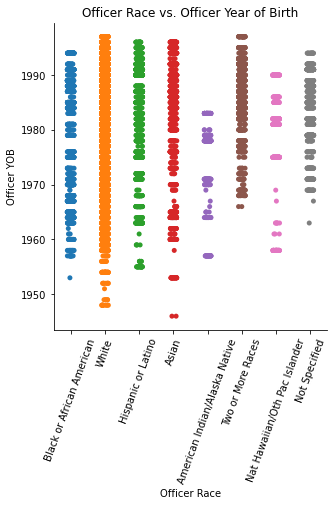

In [12]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.catplot(y='Officer YOB', x='Officer Race', data=df)
plt.title("Officer Race vs. Officer Year of Birth")
plt.xticks(rotation=70)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

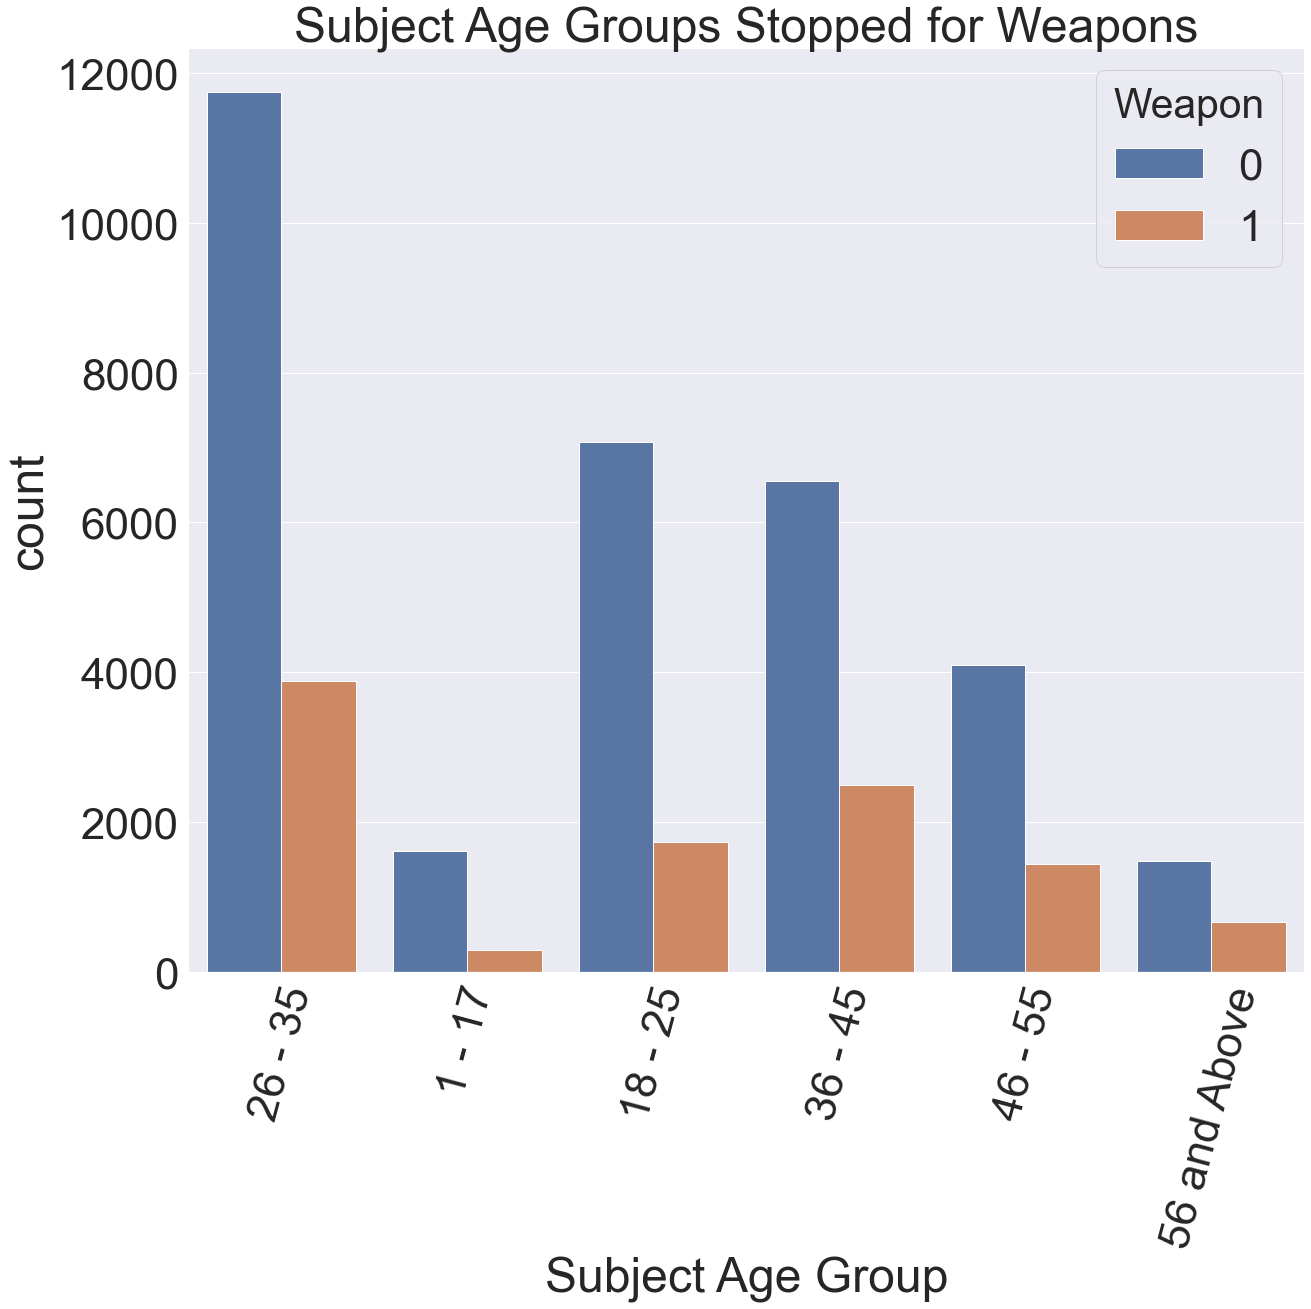

In [13]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=4)
sns.countplot(x='Subject Age Group', hue= 'Weapon', data=df)
plt.title("Subject Age Groups Stopped for Weapons")
plt.xticks(rotation=75)


In [14]:
# How often do police roll up without calls being made?

df.groupby(['Officer Race', 'Subject Perceived Race', 'Call Made']).median().head()

Officer YOB  \
Officer Race                  Subject Perceived Race           Call Made                
American Indian/Alaska Native American Indian or Alaska Native 0               1964.0   
                                                               1               1979.0   
                              Asian                            0               1978.0   
                                                               1               1978.0   
                              Black or African American        0               1978.0   

                                                                          Weapon  \
Officer Race                  Subject Perceived Race           Call Made           
American Indian/Alaska Native American Indian or Alaska Native 0             0.0   
                                                               1             0.0   
                              Asian                            0             0.0   
                                                               1             0.0   
                              Black or African American        0             0.0   

                                                                          Arrest Made  \
Officer Race                  Subject Perceived Race           Call Made                
American Indian/Alaska Native American Indian or Alaska Native 0                  0.0   
                                                               1                  0.0   
                              Asian                            0                  0.0   
                                                               1                  0.0   
                              Black or African American        0                  0.0   

                                                                          Frisk  \
Officer Race                  Subject Perceived Race           Call Made          
American Indian/Alaska Native American Indian or Alaska Native 0            0.0   
                                                               1            0.0   
                              Asian                            0            0.0   
                                                               1            1.0   
                              Black or African American        0            0.0   

                                                                          Year Reported  
Officer Race                  Subject Perceived Race           Call Made                 
American Indian/Alaska Native American Indian or Alaska Native 0                 2015.0  
                                                               1                 2015.0  
                              Asian                            0                 2016.0  
                                                               1                 2018.0  
                              Black or African American        0                 2016.0

In [15]:
df.groupby(['Subject Perceived Race', 'Frisk', 'Arrest Made']).median().head()

Officer YOB  Weapon  \
Subject Perceived Race           Frisk Arrest Made                        
American Indian or Alaska Native 0     0                 1984.0     0.0   
                                       1                 1989.0     1.0   
                                 1     0                 1985.0     0.0   
                                       1                 1992.0     1.0   
Asian                            0     0                 1985.0     0.0   

                                                    Call Made  Year Reported  
Subject Perceived Race           Frisk Arrest Made                            
American Indian or Alaska Native 0     0                  1.0         2017.0  
                                       1                  1.0         2019.0  
                                 1     0                  1.0         2017.0  
                                       1                  1.0         2019.0  
Asian                            0     0                  1.0         2017.0

In [16]:
eda_df = pd.read_csv('Terry_Cleaned_forEDA.csv')
eda_df = eda_df.drop(['Unnamed: 0'], axis=1)
eda_df.head()



,Subject Age Group,Stop Resolution,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Beat,Weapon,Call Made,Arrest Made,Frisk,Year Reported
0,26 - 35,Arrest,7500,1984,M,Black or African American,Asian,Male,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,O2,0,0,0,0,2015
1,26 - 35,Field Contact,5670,1965,M,White,Other,Male,07:59:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,-,0,0,0,0,2015
2,26 - 35,Field Contact,4844,1961,M,White,White,Male,19:12:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,-,0,0,0,0,2015
3,26 - 35,Field Contact,7539,1963,M,White,Other,Male,04:55:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,-,0,0,0,0,2015
4,26 - 35,Field Contact,6973,1977,M,White,Black or African American,Male,00:41:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,-,0,0,0,0,2015


In [17]:
# Go back and delete '-', test this cell block
call_null = eda_df.loc[(eda_df['Call Type'] == '-')] # Find all Call Types listed as '-'
indices_todrop = call_null.index # Find the indices 
eda_df.drop(indices_todrop, axis=0, inplace=True) # Drop the rows by index

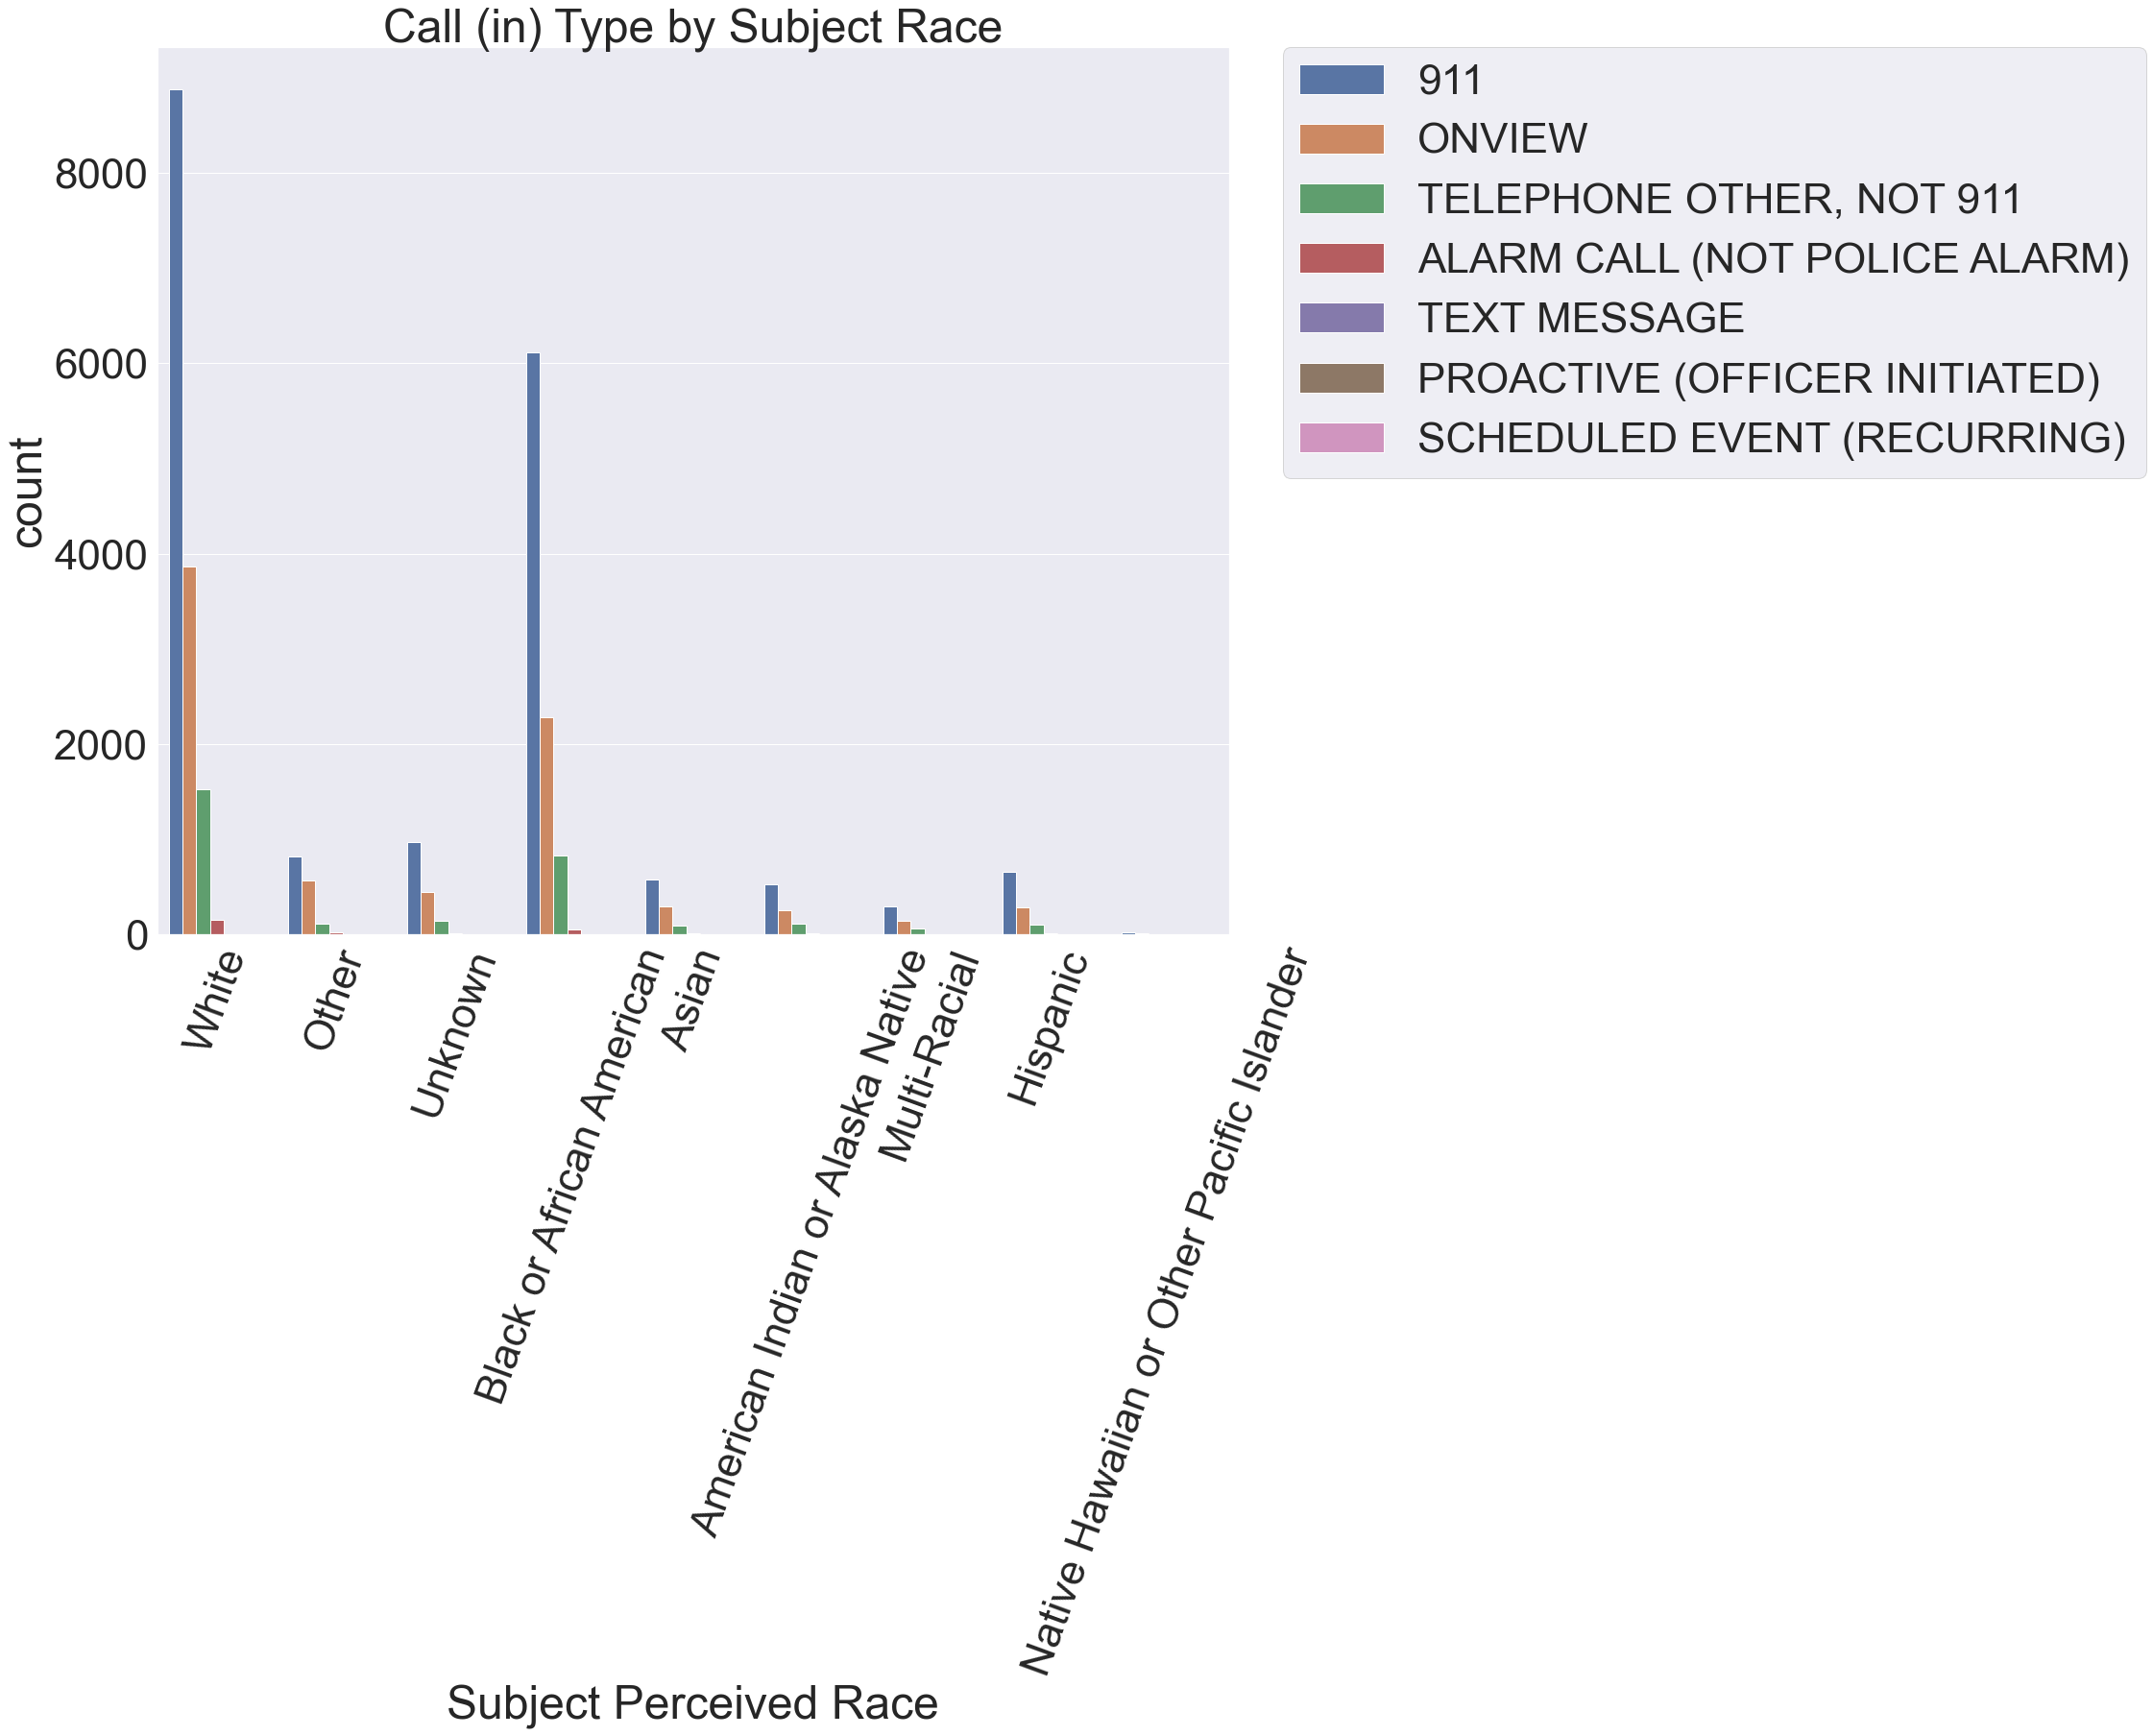

In [18]:
# Call Types by Subject Race
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=4)
sns.countplot(x='Subject Perceived Race', hue='Call Type', data=eda_df)
plt.title('Call (in) Type by Subject Race')
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


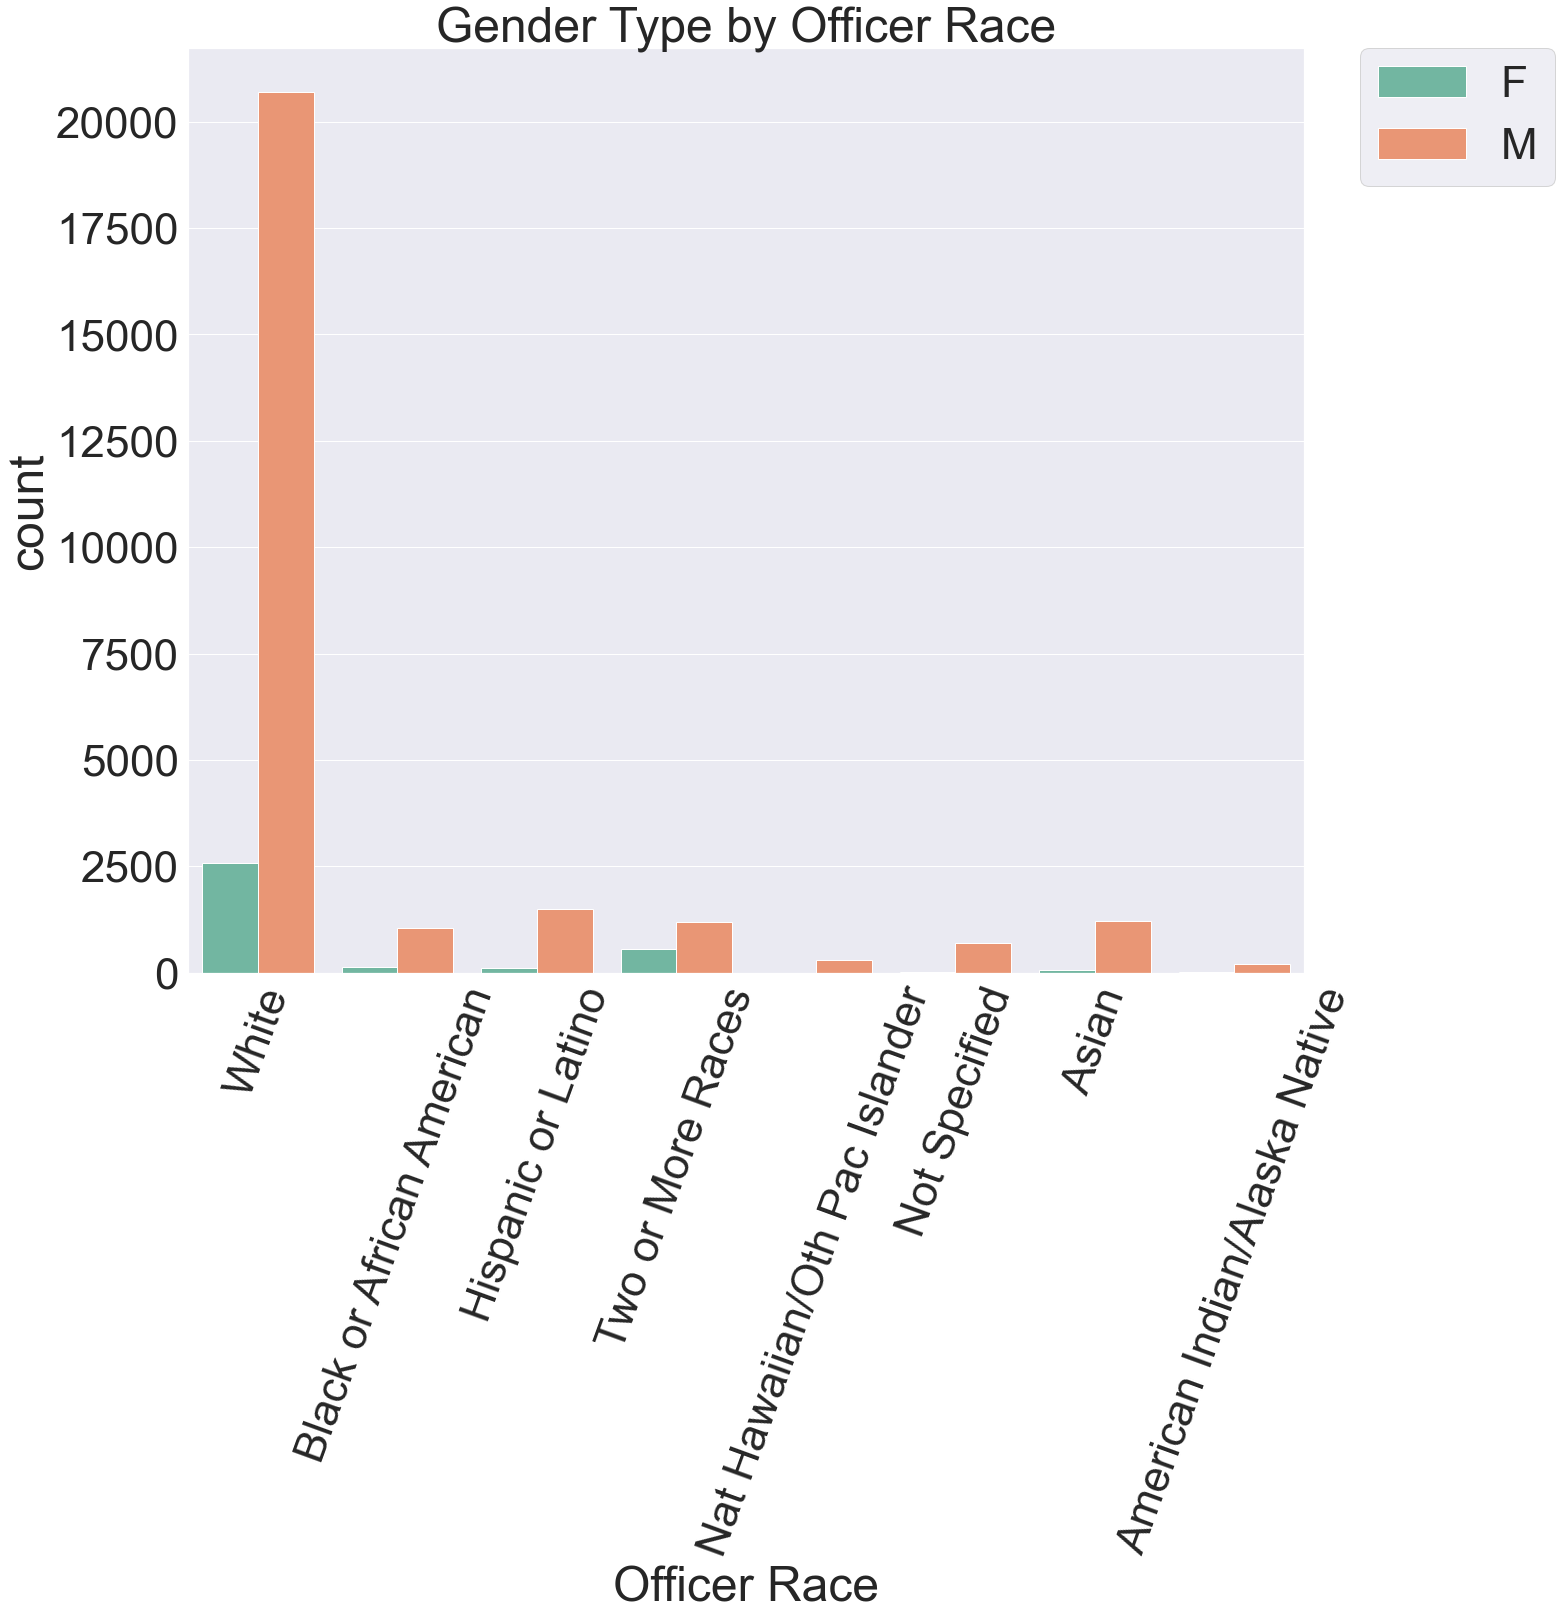

In [19]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=4)
sns.countplot(x='Officer Race', hue='Officer Gender', data=eda_df, palette="Set2")
plt.title('Gender by Officer Race')
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [20]:
eda_df['Beat'].value_counts()

N3        1020
-         1014
E2         973
M2         734
M3         685
          ... 
C2          50
N1          47
99          45
99          24
OOJ         18
Name: Beat, Length: 106, dtype: int64

In [21]:
eda_df['Initial Call Type'].value_counts(normalize=True)

SUSPICIOUS STOP - OFFICER INITIATED ONVIEW        0.092760
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            0.088332
DISTURBANCE, MISCELLANEOUS/OTHER                  0.073527
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)    0.059218
TRESPASS                                          0.056211
                                                    ...   
ESCAPE - PRISONER                                 0.000033
REQUEST TO WATCH                                  0.000033
PHONE - OBSCENE OR NUISANCE PHONE CALLS           0.000033
ALARM - RESIDENTIAL - SILENT/AUD PANIC/DURESS     0.000033
UNKNOWN - ANI/ALI - PAY PHNS (INCL OPEN LINE)     0.000033
Name: Initial Call Type, Length: 160, dtype: float64

In [22]:
initial_call = eda_df.groupby(['Initial Call Type']).mean()

In [23]:
# Find the most common initial call type
eda_df['Initial Call Type'].mode()

0    SUSPICIOUS STOP - OFFICER INITIATED ONVIEW
dtype: object

In [24]:
top_call = ['SUSPICIOUS STOP - OFFICER INITIATED ONVIEW', 'SUSPICIOUS PERSON, VEHICLE OR INCIDENT', 'DISTURBANCE, MISCELLANEOUS/OTHER', 'ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)', 'TRESPASS']  

In [25]:
susp = eda_df.loc[(eda_df['Initial Call Type'] == 'SUSPICIOUS STOP - OFFICER INITIATED ONVIEW')] 


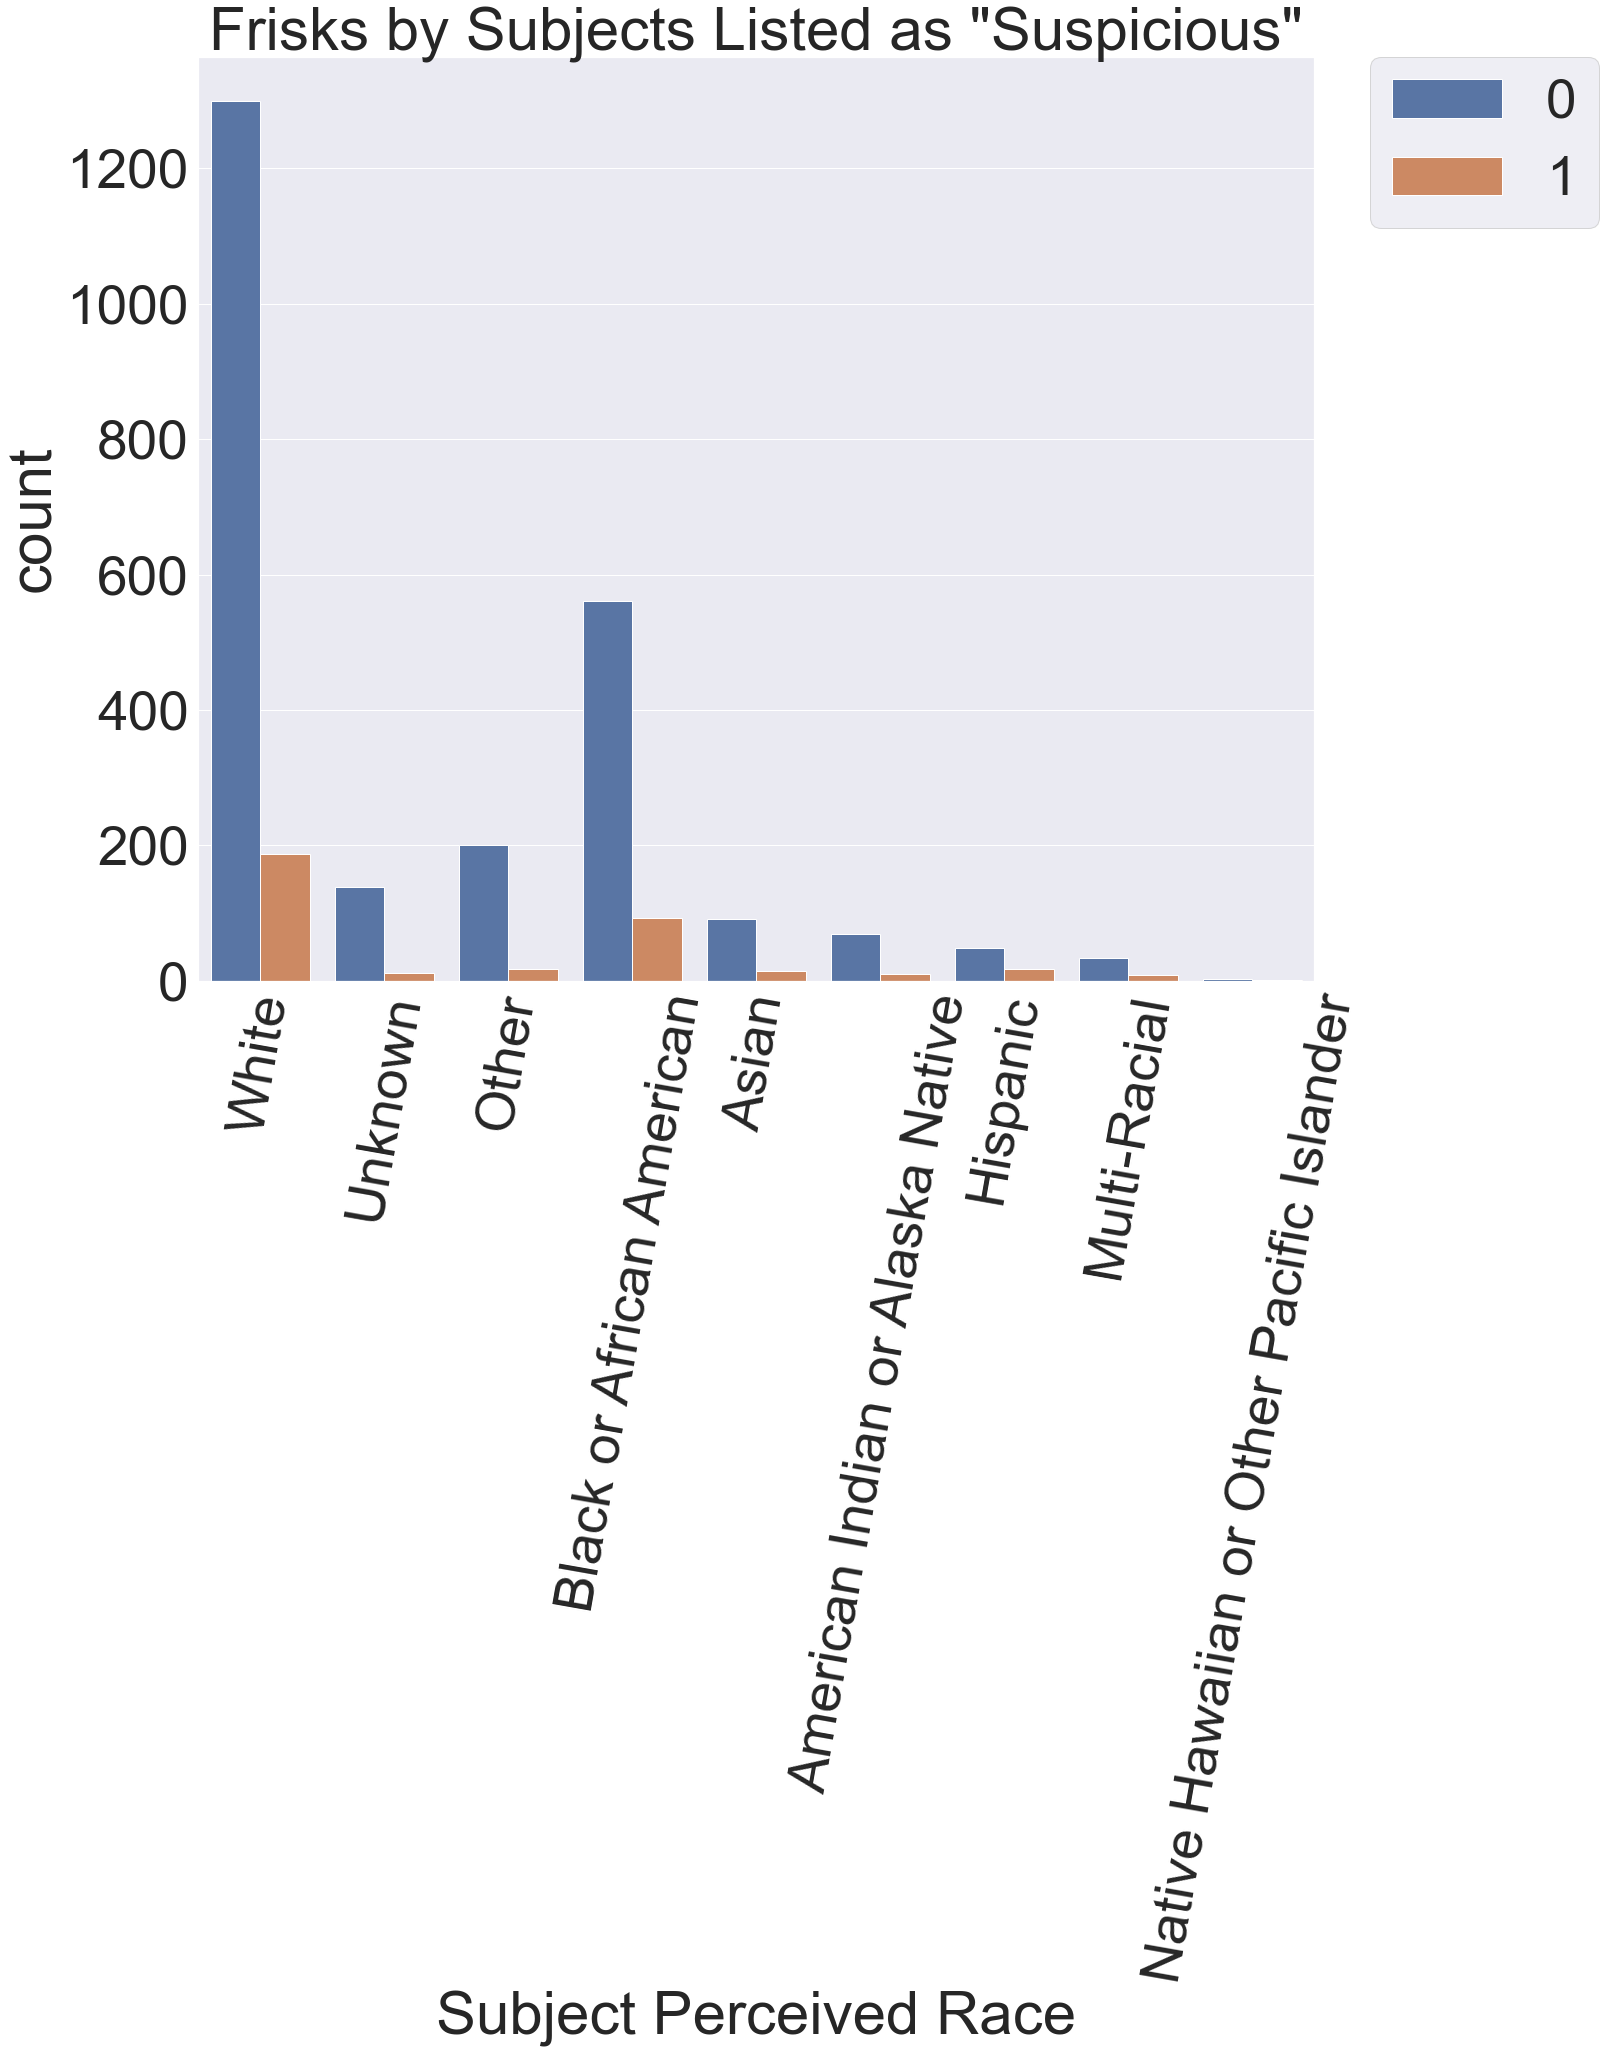

In [26]:

fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=5)
sns.countplot(x='Subject Perceived Race', hue='Frisk', data=susp)
plt.title('Frisks by Subjects Listed as "Suspicious"')
plt.xticks(rotation=80)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)




In [ ]:
fig = plt.gcf()
fig.set_size_inches(20, 17)
sns.set(font_scale=5)
sns.countplot(x='Subject Perceived Race', hue='Weapon', data=df)
plt.title('Subjects Carrying Weapons by Race')
plt.xticks(rotation=80)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


